- groupby
- Melt
- Pivot table
- Lambda
- nlargest
- lineplot
- combine

In [23]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Programs Files\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('melb_house.csv')

In [25]:
subset_area = ['Abbotsford']
subset_data = data[data['suburb'].isin(subset_area)]
subset_data


,suburb,rooms,type,price,method,seller_g,date,distance,postcode,bedroom2,...,car,landsize,building_area,year_built,council_area,latitude,longitude,region_name,property_count,yr_qtr
0,Abbotsford,2,h,NaN,SS,Jellis,2016-09-03,2.5,3067.0,2.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.8,145.0,Northern Metropolitan,4019.0,2016.3
1,Abbotsford,2,h,1.5e+06,S,Biggin,2016-12-03,2.5,3067.0,2.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.8,145.0,Northern Metropolitan,4019.0,2016.4
2,Abbotsford,2,h,1.0e+06,S,Biggin,2016-02-04,2.5,3067.0,2.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8,145.0,Northern Metropolitan,4019.0,2016.1
3,Abbotsford,3,u,NaN,VB,Rounds,2016-02-04,2.5,3067.0,3.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.8,145.0,Northern Metropolitan,4019.0,2016.1
4,Abbotsford,3,h,1.5e+06,SP,Biggin,2017-03-04,2.5,3067.0,3.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8,145.0,Northern Metropolitan,4019.0,2017.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434,Abbotsford,3,h,9.6e+05,S,Biggin,2018-02-17,3.0,3067.0,3.0,...,2.0,86.0,122.0,2004.0,Yarra City Council,-37.8,145.0,Northern Metropolitan,4019.0,2018.1
32435,Abbotsford,2,t,NaN,SP,Jellis,2018-02-17,3.0,3067.0,2.0,...,2.0,4829.0,80.0,2015.0,Yarra City Council,-37.8,145.0,Northern Metropolitan,4019.0,2018.1
32436,Abbotsford,3,h,1.2e+06,S,Biggin,2018-02-17,3.0,3067.0,3.0,...,1.0,211.0,93.0,1970.0,Yarra City Council,-37.8,145.0,Northern Metropolitan,4019.0,2018.1
32946,Abbotsford,3,h,1.4e+06,S,Jellis,2018-03-17,3.0,3067.0,3.0,...,2.0,307.0,NaN,1900.0,Yarra City Council,-37.8,145.0,Northern Metropolitan,4019.0,2018.1


In [26]:
average_cost_subset = subset_data.groupby('suburb')['price'].mean()
average_cost_subset.head()

suburb
Abbotsford    1.0e+06
Name: price, dtype: float64

In [27]:
Typeandroom= pd.melt(subset_data, id_vars=["type"], value_vars=["rooms"])
Typeandroom

,type,variable,value
0,h,rooms,2
1,h,rooms,2
2,h,rooms,2
3,u,rooms,3
4,h,rooms,3
...,...,...,...
132,h,rooms,3
133,t,rooms,2
134,h,rooms,3
135,h,rooms,3


In [28]:
table = pd.pivot_table(subset_data, values='price', index=['type'],
                       columns=['rooms'], aggfunc="mean", fill_value=0)
table

rooms,1,2,3,4
type,,,,
h,0.0,1.1e+06,1.3e+06,1.6e+06
t,0.0,8.0e+05,1.0e+06,1.5e+06
u,427208.3,6.6e+05,1.2e+06,0.0e+00


In [29]:
data['suburb'] = data['suburb'].apply(lambda x: 'The One I Want' if x == 'Abbotsford' else x)
data['seller_g'] = data['seller_g'].apply(lambda x: 'The Salesman that help me' if x == 'Biggin' else x)

data.head()

,suburb,rooms,type,price,method,seller_g,date,distance,postcode,bedroom2,...,car,landsize,building_area,year_built,council_area,latitude,longitude,region_name,property_count,yr_qtr
0,The One I Want,2,h,NaN,SS,Jellis,2016-09-03,2.5,3067.0,2.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.8,145.0,Northern Metropolitan,4019.0,2016.3
1,The One I Want,2,h,1.5e+06,S,The Salesman that help me,2016-12-03,2.5,3067.0,2.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.8,145.0,Northern Metropolitan,4019.0,2016.4
2,The One I Want,2,h,1.0e+06,S,The Salesman that help me,2016-02-04,2.5,3067.0,2.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8,145.0,Northern Metropolitan,4019.0,2016.1
3,The One I Want,3,u,NaN,VB,Rounds,2016-02-04,2.5,3067.0,3.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.8,145.0,Northern Metropolitan,4019.0,2016.1
4,The One I Want,3,h,1.5e+06,SP,The Salesman that help me,2017-03-04,2.5,3067.0,3.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8,145.0,Northern Metropolitan,4019.0,2017.1


In [30]:
top_3_expensive = subset_data.nlargest( 3, 'price')
average_top_3 = top_3_expensive['price'].mean()
print("Average cost for top 3 expensive place to stay in Abbotsford:\n", average_top_3)

Average cost for top 3 expensive place to stay in Abbotsford:
 1897000.0


In [37]:
Pricepersize = subset_data.groupby('landsize')['price'].mean()
Pricepersize



landsize
0.0       6.6e+05
86.0      9.6e+05
92.0      1.0e+06
94.0      8.5e+05
98.0      1.1e+06
           ...   
1521.0    5.5e+05
2379.0    7.5e+05
4290.0    1.1e+06
4292.0        NaN
4829.0        NaN
Name: price, Length: 64, dtype: float64

<Axes: xlabel='year_built', ylabel='price'>

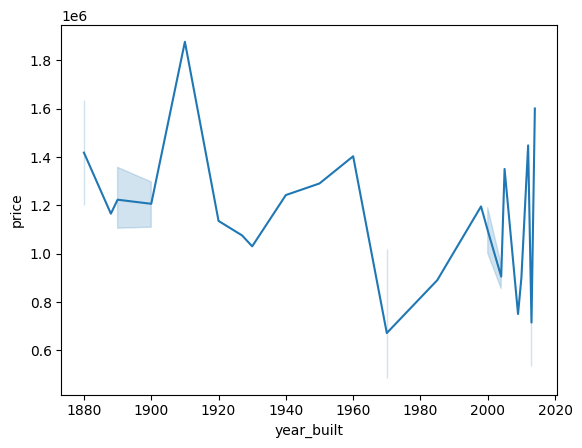

In [43]:
Line=sns.lineplot(data=subset_data,x="year_built",y="price")
Line


In [54]:
data2= pd.read_csv('apple.csv')
result = pd.concat([data, data2])
result

,suburb,rooms,type,price,method,seller_g,date,distance,postcode,bedroom2,...,latitude,longitude,region_name,property_count,yr_qtr,close,volume,open,high,low
0,The One I Want,2.0,h,NaN,SS,Jellis,2016-09-03,2.5,3067.0,2.0,...,-37.8,145.0,Northern Metropolitan,4019.0,2016.3,NaN,NaN,NaN,NaN,NaN
1,The One I Want,2.0,h,1.5e+06,S,The Salesman that help me,2016-12-03,2.5,3067.0,2.0,...,-37.8,145.0,Northern Metropolitan,4019.0,2016.4,NaN,NaN,NaN,NaN,NaN
2,The One I Want,2.0,h,1.0e+06,S,The Salesman that help me,2016-02-04,2.5,3067.0,2.0,...,-37.8,145.0,Northern Metropolitan,4019.0,2016.1,NaN,NaN,NaN,NaN,NaN
3,The One I Want,3.0,u,NaN,VB,Rounds,2016-02-04,2.5,3067.0,3.0,...,-37.8,145.0,Northern Metropolitan,4019.0,2016.1,NaN,NaN,NaN,NaN,NaN
4,The One I Want,3.0,h,1.5e+06,SP,The Salesman that help me,2017-03-04,2.5,3067.0,3.0,...,-37.8,145.0,Northern Metropolitan,4019.0,2017.1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,NaN,NaN,NaN,NaN,NaN,NaN,2017/11/17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,170.2,21884010.0000,171.0,171.4,169.6
250,NaN,NaN,NaN,NaN,NaN,NaN,2017/11/16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,171.1,23598650.0000,171.2,171.9,170.3
251,NaN,NaN,NaN,NaN,NaN,NaN,2017/11/15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,169.1,28998220.0000,170.0,170.3,168.4
252,NaN,NaN,NaN,NaN,NaN,NaN,2017/11/14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,171.3,24683350.0000,173.0,173.5,171.2


In [48]:
subset_place = ['Altona', 'Airport West']
subset_data2 = data[data['suburb'].isin(subset_place)]
average_cost_subset2 = subset_data2.groupby('suburb')['price'].mean()
average_cost_subset2.head()

suburb
Airport West    751364.2
Altona          884155.5
Name: price, dtype: float64